# Descriptive Statistics

1. Descriptive Statistics and Graphs
2. Number of Tweets (Total)
3. Number of Tweets (Time Series)
4. Gender Distribution
5. Language Distribution
6. Follower Counts
7. Client Usage (Android, iPhone, web etc.)

# Jupyter Notebook Style
Let's make this thing look nice.

In [2]:
from IPython.core.display import HTML
styles = open("../css/custom.css", "r").read()
HTML(styles)

In [1]:
import pandas as pd
import numpy as np

# Read .tsv File with Tweets
Path to the tsv file where previously fetched tweets are.

In [5]:
tsvpath = '/Users/rcn/Desktop/twitter-analysis/data/tweets.tsv'

In [7]:
twitterData=pd.read_table(tsvpath,
                          encoding='utf-8',
                          na_values=['NaN',''],
                          parse_dates=[1]
                        )
# Read in TSV and turn off NaN catching to leave in unrecognised genders

In [8]:
twitterData.head()

,Tweet ID,Time,User,Username,Text,Language,User Location,Geo,Place,Likes,Retweets,Followers,Friends,Listed,Favourites,Hashtags,Mentions,Links,User Description
0,695206295205359616,2016-02-04 11:24:31,UNICEF India,UNICEFIndia,14-year-old Praveen dreams of protecting his c...,en,India,NaN,NaN,20,17,72165,3405,584,901,NaN,NaN,NaN,UNICEF is the leading organisation advocating ...
1,694808599592185857,2016-02-03 09:04:13,UNICEF India,UNICEFIndia,RT @WaterAidIndia: @UNICEFIndia's @MamitaBora ...,en,India,NaN,NaN,0,5,72165,3405,584,901,NaN,NaN,NaN,UNICEF is the leading organisation advocating ...
2,694759407310090241,2016-02-03 05:48:45,UNICEF India,UNICEFIndia,Saloni is 17. She believes that women's safety...,en,India,NaN,NaN,27,23,72165,3405,584,901,NaN,NaN,NaN,UNICEF is the leading organisation advocating ...
3,694521994956578816,2016-02-02 14:05:21,UNICEF India,UNICEFIndia,"""Hello! How are you?"", says Pawan Vishwakarma...",en,India,NaN,NaN,6,5,72165,3405,584,901,NaN,NaN,NaN,UNICEF is the leading organisation advocating ...
4,693664923159629824,2016-01-31 05:19:40,UNICEF India,UNICEFIndia,"3 Youth, Children used whistles to create awar...",en,India,NaN,NaN,24,24,72165,3405,584,901,NaN,NaN,NaN,UNICEF is the leading organisation advocating ...


In [9]:
twitterData.dtypes

Tweet ID                     int64
Time                datetime64[ns]
User                        object
Username                    object
Text                        object
Language                    object
User Location               object
Geo                        float64
Place                      float64
Likes                        int64
Retweets                     int64
Followers                    int64
Friends                      int64
Listed                       int64
Favourites                   int64
Hashtags                   float64
Mentions                   float64
Links                      float64
User Description            object
dtype: object

## All Tweets

### Number of Tweets

In [10]:
nTweets = len(twitterData.index)
print "There are", nTweets, "tweets in the full dataset"

There are 6742 tweets in the full dataset


### Number of Tweets Over Time

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

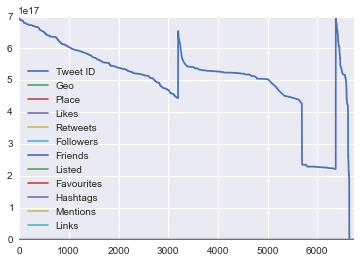

In [16]:
twitterData.plot()

### Documents by Twitter Language

In [17]:
nLanguage = twitterData.Language.value_counts(sort=True, ascending=False, bins=None)
nLanguage[0:10]

en     6572
hi       60
und      52
in       16
tl        9
et        7
it        6
ro        4
ht        3
es        3
Name: Language, dtype: int64

In [18]:
nLanguage = twitterData.Language.value_counts(normalize=True, sort=True, ascending=False, bins=None)
nLanguage[0:10]

en     0.974785
hi     0.008899
und    0.007713
in     0.002373
tl     0.001335
et     0.001038
it     0.000890
ro     0.000593
ht     0.000445
es     0.000445
Name: Language, dtype: float64

### Number of Documents by Location

In [20]:
nLocation = twitterData['User Location'].value_counts(normalize=False, sort=True, ascending=False, bins=None)
nLocation[0:15]

India     6374
Mumbai     368
Name: User Location, dtype: int64

### Number of Documents by UNGP Location

In [37]:
# Getting Vincent ready 
vincent.initialize_notebook()
gpBlue='#00aeef'
gpLightGray='#96999b'
gpDarkBlue='#00447c'
gpRed='#cf5c42'
gpBrown='#e1d8ad'
gpPink='#f4d5e3'
gpLightBlue='#e1f4fd'

In [39]:
location_grouped = twitterData.groupby('UNGPLocation')
mean_location_grouped = location_grouped.mean().dropna()
mean_followers = mean_location_grouped.sort('Followers')['Followers']
followersBar = vincent.Bar(mean_followers)
followersBar.axis_titles(x='Country', y='Followers')
from vincent.axes import AxisProperties
from vincent.properties import PropertySet
from vincent.values import ValueRef
for axis in followersBar.axes:
    axis.properties = AxisProperties()
    for prop in ['ticks', 'axis', 'major_ticks', 'minor_ticks']:
        setattr(axis.properties, prop, PropertySet(stroke=ValueRef(value=gpLightGray)))
    axis.properties.title = PropertySet(font_size=ValueRef(value=20), 
                                        fill=ValueRef(value=gpLightGray))
    axis.properties.labels = PropertySet(fill=ValueRef(value=gpLightGray))
followersBar.axes[0].properties.labels.angle = ValueRef(value=0)
followersBar.axes[0].properties.labels.align = ValueRef(value='center')
followersBar.axes[0].properties.title.dy = ValueRef(value=20)
followersBar.scales[2].range = [gpBlue]
followersBar.to_json('../charts/followersBar.json')
followersBar

In [40]:
location_grouped = twitterData.groupby('UNGPLocation')
mean_location_grouped = location_grouped.mean().dropna()
mean_friends = mean_location_grouped.sort('Friends')['Friends']
friendsBar = vincent.Bar(mean_friends)
friendsBar.axis_titles(x='Country', y='Friends')
for axis in friendsBar.axes:
    axis.properties = AxisProperties()
    for prop in ['ticks', 'axis', 'major_ticks', 'minor_ticks']:
        setattr(axis.properties, prop, PropertySet(stroke=ValueRef(value=gpLightGray)))
    axis.properties.title = PropertySet(font_size=ValueRef(value=20), 
                                        fill=ValueRef(value=gpLightGray))
    axis.properties.labels = PropertySet(fill=ValueRef(value=gpLightGray))
friendsBar.axes[0].properties.labels.angle = ValueRef(value=0)
friendsBar.axes[0].properties.labels.align = ValueRef(value='center')
friendsBar.axes[0].properties.title.dy = ValueRef(value=20)
friendsBar.scales[2].range = [gpDarkBlue]
friendsBar.to_json('../charts/friendsBar.json')
friendsBar

In [41]:
location_grouped = twitterData.groupby('UNGPLocation')
mean_location_grouped = location_grouped.mean().dropna()
mean_genderProb = mean_location_grouped.sort('UNGPGenderProb')['UNGPGenderProb']
genderProb = vincent.Bar(mean_genderProb)
genderProb.axis_titles(x='Country', y='Average Gender Probablility')
for axis in genderProb.axes:
    axis.properties = AxisProperties()
    for prop in ['ticks', 'axis', 'major_ticks', 'minor_ticks']:
        setattr(axis.properties, prop, PropertySet(stroke=ValueRef(value=gpLightGray)))
    axis.properties.title = PropertySet(font_size=ValueRef(value=20), 
                                        fill=ValueRef(value=gpLightGray))
    axis.properties.labels = PropertySet(fill=ValueRef(value=gpLightGray))
genderProb.axes[0].properties.labels.angle = ValueRef(value=0)
genderProb.axes[0].properties.labels.align = ValueRef(value='center')
genderProb.axes[0].properties.title.dy = ValueRef(value=20)
genderProb.scales[2].range = [gpRed]
genderProb.to_json('../charts/genderProbBar.json')
genderProb

In [42]:
mpld3.enable_notebook()
gatesCountry = twitterData.UNGPLocation.value_counts(normalize=False, sort=True, ascending=False, bins=None)
gatesCountryFig = gatesCountry.plot(kind='barh', color='#00aeef')
mpld3.display()

/usr/local/lib/python2.7/dist-packages/mpld3/mplexporter/exporter.py:82: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


AttributeError: 'BlendedGenericTransform' object has no attribute 'contains_branch'

In [70]:
import ggplot as gg
(ggplot(gg.aes(x='UNGPLocation'), data=twitterData)
+ gg.geom_bar() + gg.ggtitle("Gates Tweets")
+ gg.labs("Country", "Number of tweets"))

TypeError: 'module' object is not callable

In [77]:
languagePlot = ggplot(aes(x='DataSiftLanguage'), data=twitterData) + geom_bar() + ggtitle("Language Distribution") + labs("Language", "Number of tweets")
languagePlot

NameError: name 'aes' is not defined

In [1]:
from IPython.core.display import HTML
styles = open("../css/custom.css", "r").read()
HTML(styles)